# DESAFIO 01

  -> Primeiramente pegamos todos os dados necessários e fazemos a junção somente daquilo que é relevante. 

In [0]:
import pandas as pd

filmes = pd.read_csv('https://raw.githubusercontent.com/JoaoPedro-Ramos/Data-Science_Movies/master/Doc_Aula_01/ml-latest-small/movies.csv')
avaliacoes = pd.read_csv('https://raw.githubusercontent.com/JoaoPedro-Ramos/Data-Science_Movies/master/Doc_Aula_01/ml-latest-small/ratings.csv')


In [0]:
media_notas = avaliacoes.groupby('movieId')['rating'].mean()

In [0]:
tot = filmes.join(media_notas, on='movieId')

In [97]:
tot.head()

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


# Ordenando os filmes em ordem de rating (do menor para o maior)

-> Pegamos os 18 ultimos filmes, que são aqueles que não possuem notas.


In [0]:
# filmes_sem_nota = tot.sort_values('rating')[-18:]
# filmes_sem_nota

tot['rating'].isnull().value_counts()
filmes_sem_notas = tot['rating'].isnull()

In [102]:
tot[filmes_sem_notas] # se o retorno for True vai aparecer senão não vai

,movieId,title,genres,rating
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


# DESAFIO 2

  -> Vamos alterar os nomes das colunas

In [0]:
tot.columns = ['filmeId', 'titulo do filme', 'genero', 'média de notas']

In [110]:
tot.head()

,filmeId,titulo do filme,genero,média de notas
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


# DESAFIO 3

  -> Vamos pegar o número de avaliações por filme

In [0]:
avaliacoes.columns = ['usuarioId', 'filmeId', 'nota', 'momento']

In [0]:
avaliacoes_por_filme = avaliacoes.groupby('filmeId')['nota'].count()
res = tot.join(avaliacoes_por_filme, on='filmeId')
res.rename(columns={'nota': 'quantidade de avaliações'}, inplace=True)

In [124]:
res.head()

,filmeId,titulo do filme,genero,média de notas,quantidade de avaliações
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


# DESAFIO 4

  -> Arredondar as médias para uma casas decimais

In [0]:
import numpy as np

res['média de notas'] = round(res['média de notas'], 1) # FAZ O ARREDONDAMENTO PARA UMA CASA DECIMAL
res['quantidade de avaliações'] = res['quantidade de avaliações'].values.astype(np.int64) # TRANSFORMA PARA INTEIRO 

In [16]:
res.head()

,filmeId,titulo,genero,média de notas,quantidade de avaliações
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.9,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.4,110
2,3,Grumpier Old Men (1995),Comedy|Romance,3.3,52
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.4,7
4,5,Father of the Bride Part II (1995),Comedy,3.1,49


# DESAFIO 5

  -> Descobrir o número de aparições de cada genero


In [34]:
# na série filmes['genres'] nós a tratamos como string e passamos o get_dummies('|') para especificar em que caracter vai ocorrer a separação, isso retorna uma tabela de informações, por fim pegamos essa tabela e somamos os valor com .sum() = soma das colunas / .sum(axis=1) = soma da linha
# .sort_values() para ordenar em ordem crescente / .sort_values(ascending=False) para ordenar em ordem decrescente
filmes['genres'].str.get_dummies('|').sum().sort_values(ascending=False) 

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

# DESAFIO 6

  -> Plotar um gráfico desses generos

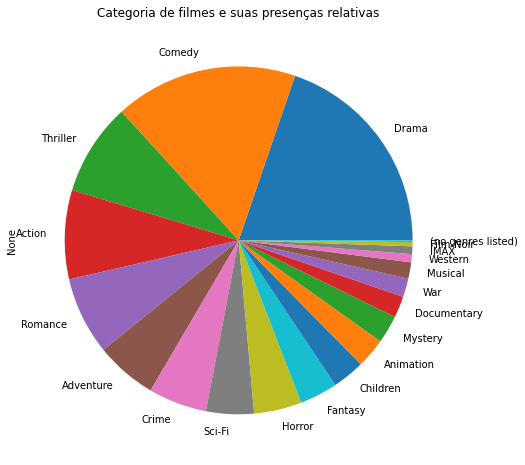

In [41]:
import matplotlib.pyplot as plt

# gráfico de pizza

filmes['genres'].str.get_dummies('|').sum().sort_values(ascending=False).plot(
    kind='pie', 
    title='Categoria de filmes e suas presenças relativas',
    figsize=(8, 8))
plt.show()

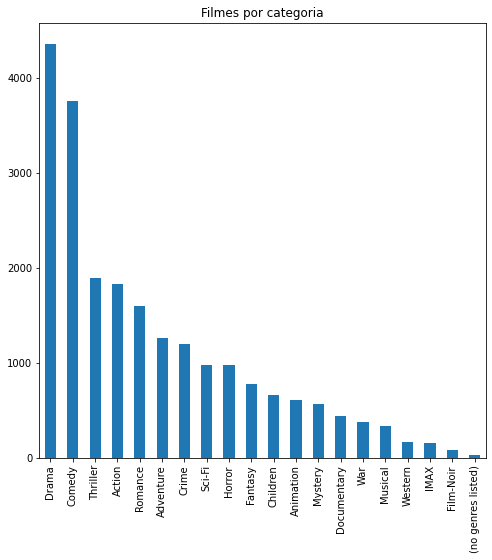

In [44]:
filmes['genres'].str.get_dummies('|').sum().sort_values(ascending=False).plot(
    kind='bar',  # gráfico de barras
    title='Filmes por categoria',
    figsize=(8, 8))
plt.show()

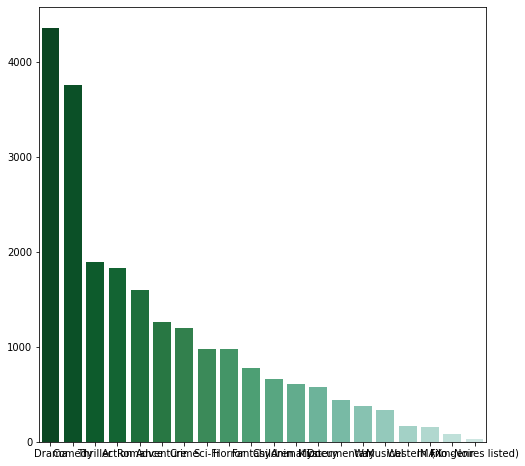

In [53]:
 import seaborn as sns 

filmes_por_genero = filmes['genres'].str.get_dummies('|').sum().sort_values(ascending=False)

plt.figure(figsize=(8, 8))

sns.barplot(x = filmes_por_genero.index,
             y = filmes_por_genero.values,
            palette = sns.color_palette('BuGn_r', n_colors=len(filmes_por_genero) + 6))
 
plt.show()

# DESAFIO 1 / AULA 02

  -> Rotacionar os ticks


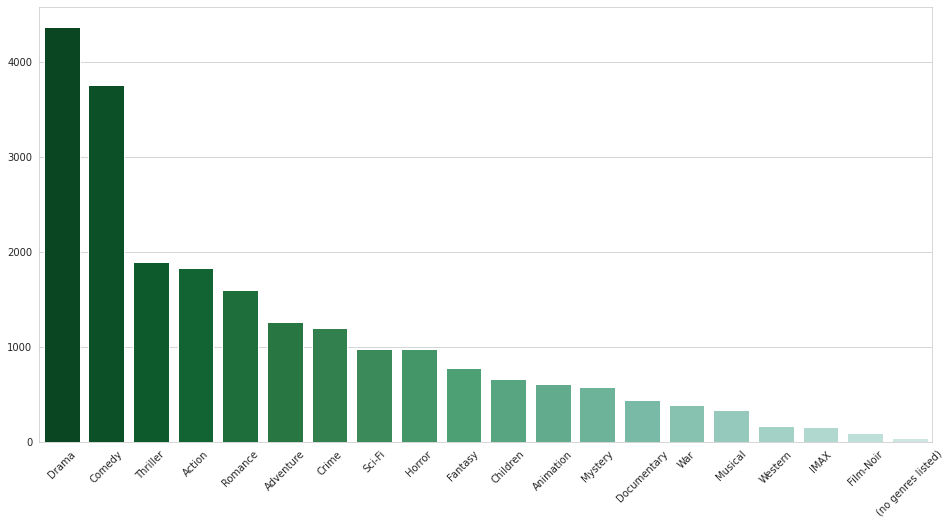

In [58]:
sns.set_style('whitegrid') # grid com linhas horizontais

plt.figure(figsize=(16, 8)) # dimensões do gráfico
plt.xticks(rotation=45) # rotacionar os ticks do eixo x
sns.barplot(x = filmes_por_genero.index,
             y = filmes_por_genero.values,
            palette = sns.color_palette('BuGn_r', n_colors=len(filmes_por_genero) + 6))
 
plt.show()

##############################################

In [78]:
res.sort_values('média de notas', ascending=False)

,filmeId,titulo,genero,média de notas,quantidade de avaliações
8334,107771,Only Lovers Left Alive (2013),Drama|Horror|Romance,5.0,1
5497,26366,Harlan County U.S.A. (1976),Documentary,5.0,1
9142,147326,The Adventures of Sherlock Holmes and Doctor W...,Crime|Mystery,5.0,1
9143,147328,The Adventures of Sherlock Holmes and Dr. Wats...,Crime,5.0,1
7513,83969,Down Argentine Way (1940),Comedy|Drama|Romance,5.0,1
...,...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN,-9223372036854775808
5824,32160,Twentieth Century (1934),Comedy,NaN,-9223372036854775808
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN,-9223372036854775808
5957,34482,"Browning Version, The (1951)",Drama,NaN,-9223372036854775808


In [0]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f'filmeId == {n}')['nota']
  notas_do_filme.plot(kind='hist')
  return notas_do_filme.describe()

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

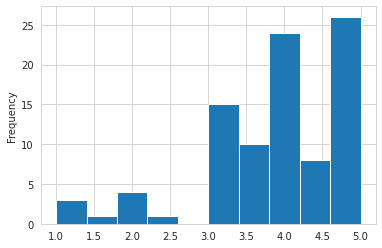

In [81]:
plot_filme(919)

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

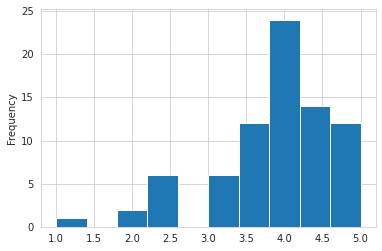

In [82]:
plot_filme(46578)

In [0]:
# boxplot

def plot_filme(n):
  notas_do_filme = avaliacoes.query(f'filmeId == {n}')['nota']
  notas_do_filme.plot(kind='hist')
  plt.show()
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()

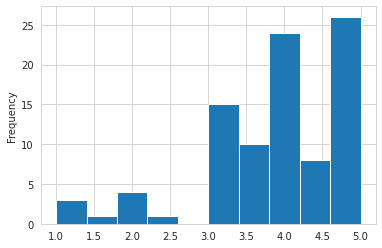

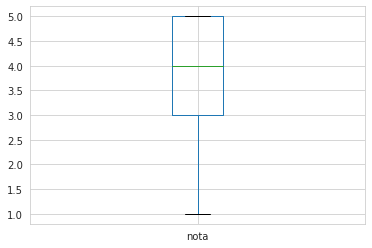

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

In [86]:
plot_filme(919)

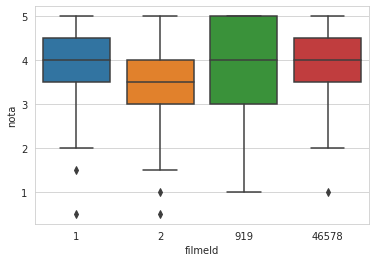

In [93]:
sns.boxplot(data = avaliacoes.query('filmeId in [1, 2, 919, 46578]'), x = 'filmeId', y = 'nota')

# DESAFIO 2 / AULA 2

  -> Pegar o boxplot dos 10 filmes com mais avaliações

# DESAFIO 3 / AULA 2

  -> Colocar o boxplot num tamanho adequado e com os nomes dos filmes nos ticks

# DESAFIO 4 / AULA 2

  -> Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 5.

# DESAFIO 5 / AULA 2

  -> Plotar o boxplot e o histograma um ao lado do outro (no mesmo gráfico ou em gráficos destintos)

# DESAFIO 6 / AULA 2

  -> Gráfico de notas médias por ano